In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import scipy.stats

dados = pd.read_csv("Manaus-clean.csv", sep = ",", low_memory = False )
#dados.columns
# low_memory = False só para tirar o aviso gerado ao ler diferentes dtypes em uma coluna de um arquivo.
# mas talvez seja necessário especificar os tipos de dados de "_srag" e "_evolucao".

In [2]:
dados.head()

,_idade,_faixa etária,_sexo,_bairro,_classificacao,_conclusao,_dt_notificacao,_tipo_teste,_se_notificacao,_distrito,_bairro_mapa
0,44.0,40a - 49a,F,SAO GERALDO,Confirmado,Recuperado,2020-01-30,TESTE RÁPIDO - ANTÍGENO,5.0,SUL,SÃO GERALDO
1,44.0,40a - 49a,M,PONTA NEGRA,Confirmado,Recuperado,2020-02-16,TESTE RÁPIDO - ANTICORPO,8.0,OESTE,PONTA NEGRA
2,12.0,10a - 14a,F,MAUAZINHO,Confirmado,Recuperado,2020-02-23,DESCONHECIDO,9.0,LESTE,MAUAZINHO
3,43.0,40a - 49a,F,DOM PEDRO,Confirmado,Recuperado,2020-03-09,RT-PCR,11.0,OESTE,DOM PEDRO
4,46.0,40a - 49a,F,CIDADE NOVA,Confirmado,Recuperado,2020-03-11,DESCONHECIDO,11.0,NORTE,CIDADE NOVA


## Visualização de Dados
Para a visualização de dados, apresentem gráficos que denotem as informações a seguir. Explicitem
o que denotam os eixos x e y claramente, escolham um esquema de cores compatível com a escrita
técnico-científica e utilizem legendas ao incluí-los no texto.

**1. Construa um histograma denotando a quantidade de casos nos 10 bairros em que houve mais casos registrados. Inclua todos os bairros remanescentes em uma categoria denominada “Outros.” Denote as informações de maneira percentual;**

**2. Denote, por sexo, o boxplot da idade dos casos confirmados. Há outliers?**

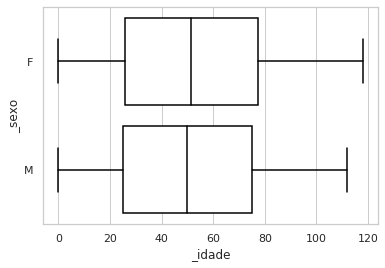

In [3]:
data = dados.groupby(['_idade', '_sexo']).size().reset_index(name='casos')

sns.set(style="whitegrid")
plot = sns.boxplot(x='_idade', y="_sexo", data=data, color='white')
plt.setp(plot.artists, edgecolor = 'black', facecolor='white')
plt.setp(plot.lines, color='black')
plt.show()

Resposta: Não há outliers

**3. Denote em um gráfico de barras o número de novos casos por dia, considerando os 10 últimos dias existentes na base de dados;**

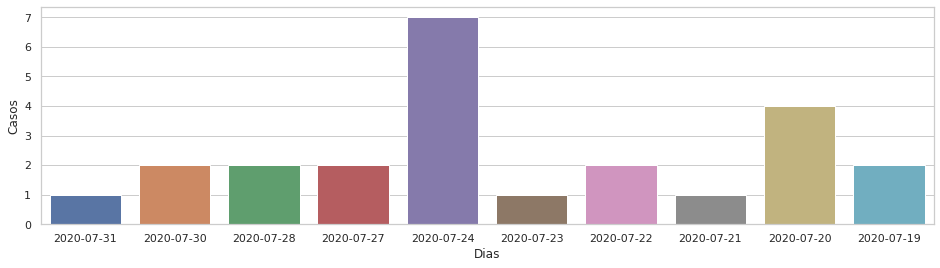

In [4]:
z = dados['_dt_notificacao'].value_counts()
t = dados["_dt_notificacao"].value_counts().index.values
df = pd.DataFrame({'Data':t, 'Novos casos':z})
df = df.sort_values('Data',ascending=False)

b = df["Data"][0:10]
c = df["Novos casos"][0:10]

sns.set(style="whitegrid")

ax = sns.barplot(x=b, y=c)
fig = plt.gcf()
fig.set_size_inches(16, 4)
ax.set(xlabel='Dias', ylabel='Casos')
plt.show()

**4. Repita o gráfico anterior considerando o número de casos recuperado;**

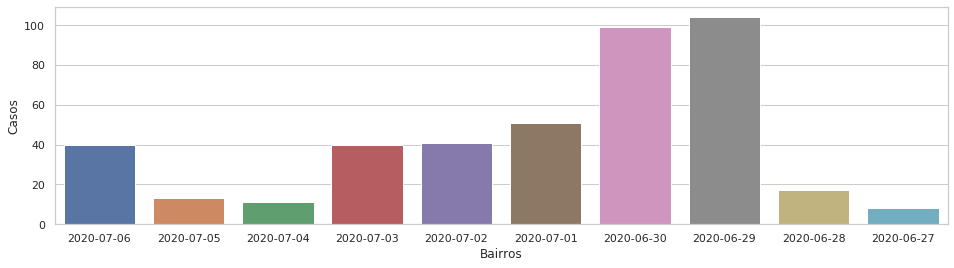

In [5]:
cr = dados.query("_conclusao == 'Recuperado'")

z = cr["_dt_notificacao"].value_counts().index.values
t = cr['_dt_notificacao'].value_counts()
df = pd.DataFrame({'Data':z, 'Novos casos':t})
df = df.sort_values('Data',ascending=False)

sns.set(style="whitegrid")

b = df["Data"][0:10]
c = df["Novos casos"][0:10]
ax = sns.barplot(x=b, y=c)
fig = plt.gcf()
fig.set_size_inches(16, 4)
ax.set(xlabel='Bairros', ylabel='Casos')
plt.show()

**5. Construa um histograma que denote a quantidade percentual de casos por grupo etário, considerando que cada grupo contempla uma década (0 a 10 anos, 11 a 20 anos, etc.);**

**6. Elabore um gráfico que mostra o cumulativo de casos notificados ao longo do tempo;**

In [8]:
c_notificados = pd.DataFrame({'Data':dados["_dt_notificacao"].value_counts().index.values, 'Novos casos':dados["_dt_notificacao"].value_counts()})
c_notificados = c_notificados.sort_values('Data',ascending=True)
c_notificados['acumulado']= c_notificados['Novos casos'].cumsum()

fig = go.Figure()
fig.add_trace(go.Bar(x = c_notificados['Data'],
                       y = c_notificados['acumulado']))
layout = fig.update_layout(dict(title = 'Casos Confirmados até Julho de 2020'))
fig.show()

**7. Faça um gráfico do tipo scatterplot que denote a idade versus o número total de casos registrado para aquela idade. Aproveite o processamento efetuado para o cálculo da correlação. É possível observar alguma tendência?**

In [9]:
convert_dict = {'_idade': int} 
dados = dados.astype(convert_dict)

# Logo após, agrupo os casos por idade e vejo a correlação desses dois atributos
group_idade_casos = dados.groupby(['_idade']).size().reset_index(name='casos')
idade = group_idade_casos['_idade']
casos = group_idade_casos['casos']

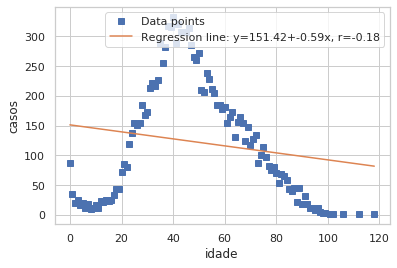

In [10]:
slope, intercept, pearsoncorrelation, p, stderr = scipy.stats.linregress(idade, casos)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={pearsoncorrelation:.2f}'
fig, ax = plt.subplots()
ax.plot(idade, casos, linewidth=0, marker='s', label='Data points')
ax.plot(idade, intercept + slope * idade, label=line)
ax.set_xlabel('idade')
ax.set_ylabel('casos')
ax.legend(facecolor='white')
plt.show()

## Tipos de Tarefas
Recapitulem que dados fornecem experiência sobre um problema. No caso em questão, sugira:

**1. Uma tarefa de classificação mediante Aprendizado Supervisionado que poderia ser feita com
esta base de dados. Qual seria o atributo-alvo? Quais métricas de desempenho poderiam ser
aplicadas? Que tipo de validação seria apropriado?**



**2. Uma tarefa de regressão mediante Aprendizado Supervisionado que poderia ser feita com esta base de dados. Qual seria o atributo-alvo? Quais atributos preditores a equipe considera relevantes para o cenário?**



**3. Bônus: Qual tarefa de Aprendizado Não-Supervisionado poderia ser concebida neste contexto?**